In [2]:
from astropy.io import fits
from glob import glob
import numpy as np
from skimage.registration import phase_cross_correlation
import scipy.optimize as opt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline

### Collate data

In [3]:
file_names = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/photometry_lab/2020-10-31/HD209458.2020-10-31T22*.fits')
images = []
for i in range(len(file_names)):
    images.append(fits.getdata(np.sort(file_names)[i]))

In [4]:
im_array = np.array(images)
im_array.shape

(738, 844, 1117)

In [5]:
file_names_10_30 = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/photometry_lab/2020-10-30/HD209458_seq*.fits')
images_10_30 = []
for i in range(len(file_names_10_30)):
    images_10_30.append(fits.getdata(np.sort(file_names_10_30)[i]))

im_array_10_30 = np.array(images_10_30)
print(im_array_10_30.shape)

(645, 844, 1117)


In [7]:
fits.getheader(np.sort(file_names_10_30)[9])

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1117 / length of data axis 1                          
NAXIS2  =                  844 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
INSTRUME= 'SBIG CCD'           / CCD Name                                       
TELESCOP= 'Telescope Simulator' / Telescope name                                
OBSERVER= 'GROUP 4 '           / Observer name                                  
OBJECT  = 'HD209458'           / Object name                                    
EXPTIME =         1.000000E+

In [6]:
# same with flat frames
file_names_flats = glob('/Users/chris/Desktop/uf_grad_school/obs_tech/photometry_lab/2020-10-31/HD209458_flats*.fits')
images_flats = []
for i in range(len(file_names_flats)):
    images_flats.append(fits.getdata(np.sort(file_names_flats)[i]))
im_array_flats = np.array(images_flats)
print(im_array_flats.shape)

(20, 844, 1117)


In [5]:
fits.getheader(np.sort(file_names_flats)[9])

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1117 / length of data axis 1                          
NAXIS2  =                  844 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
INSTRUME= 'SBIG CCD'           / CCD Name                                       
TELESCOP= 'Telescope Simulator' / Telescope name                                
OBSERVER= 'GROUP 3 '           / Observer name                                  
OBJECT  = 'V FLAT  '           / Object name                                    
EXPTIME =         2.000000E+

[[13545.  13640.5 13613.5 ...  9870.   9956.   9870.5]
 [13569.5 13643.5 13550.5 ...  9764.   9821.   9843. ]
 [13582.  13613.5 13416.  ...  9733.5  9907.5  9993. ]
 ...
 [15901.5 16058.  15930.5 ... 12807.5 13007.5 12852.5]
 [15869.5 15831.5 15987.5 ... 13000.  12987.5 12965.5]
 [16044.  15945.5 15777.  ... 12826.5 12952.5 13024.5]]


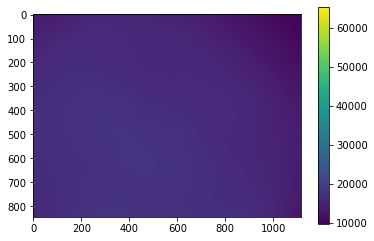

In [8]:
# median-combine flat field frames
flat_vis = np.median(1.0*im_array_flats, axis=0)
print(flat_vis)
plt.imshow(flat_vis)
plt.colorbar()
plt.show()

Align frames

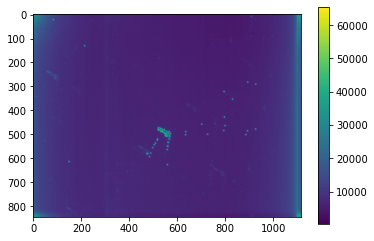

In [9]:
def stack_shift_median(file_names): # new
    images = []
    og = imageio.imread(np.sort(file_names)[0])
    for i in range(len(file_names)):
        image = imageio.imread(np.sort(file_names)[i])
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og, image)
        # apply shift
        images.append(np.roll(image, [int(shift) for shift in pcc[0]], axis=(0,1)))
    return np.median(np.array(np.stack(images)), axis=0)

og = chunk[0]
for i in range(len(chunk)):
    # calculate shift for each image relative to first
    pcc = phase_cross_correlation(og, chunk[i])
    #print(pcc[0])
    # apply shift; list comprehension is bc PCC outputs floats, not ints
    og += np.roll(chunk[i], [int(shift) for shift in pcc[0]], axis=(0,1))
    
plt.imshow(og)
plt.colorbar()
#plt.ylim([600, 400]) # to keep things oriented the same as full CCD image
#plt.xlim([400, 600])
plt.show()

[[2279 2164 2085 ... 1439 1588 1601]
 [2070 2070 2123 ... 1497 1488 1601]
 [2063 2054 2123 ... 1594 1590 1651]
 ...
 [1672 1590 1604 ... 1553 1645 1529]
 [1637 1603 1608 ... 1626 1602 1615]
 [1718 1671 1575 ... 1562 1648 1664]]


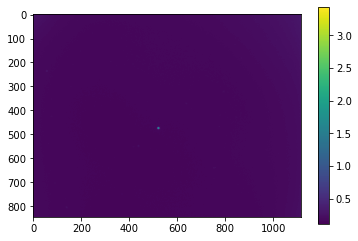

In [171]:
def shift_and_stack(chunk):
    og1 = chunk[0]
    print(og1)
    for i in range(len(chunk)):
        # calculate shift for each image relative to first
        pcc = phase_cross_correlation(og1, chunk[i])
        #print(pcc[0])
        # apply shift; list comprehension is bc PCC outputs floats, not ints
        og1 += np.roll(chunk[i], [int(shift) for shift in pcc[0]], axis=(0,1))
    return og1

#norm1 = shift_and_stack(np.array(images)[0:50])/flat_vis
norm2 = shift_and_stack(np.array(images)[0:1])/flat_vis
#%matplotlib notebook
#chunk1 = np.array(images)
plt.figure()
plt.imshow(norm2)
plt.colorbar()
#plt.ylim([600, 400]) # to keep things oriented the same as full CCD image
#plt.xlim([400, 600])
plt.show()

In [11]:
norm1

array([[1.81506091, 1.75052234, 1.7409924 , ..., 1.96778116, 2.0629771 ,
        2.00547085],
       [1.74103688, 1.71480925, 1.73934541, ..., 2.03574355, 2.05070767,
        1.98465915],
       [1.72654985, 1.69618394, 1.75954085, ..., 2.08157395, 2.00565228,
        2.09226459],
       ...,
       [1.34452725, 1.26011957, 1.25319356, ..., 1.61139957, 1.62767634,
        1.57595798],
       [1.29317244, 1.31093074, 1.2387803 , ..., 1.56707692, 1.56219442,
        1.60155798],
       [1.26969584, 1.27264746, 1.29403562, ..., 1.56652243, 1.55437174,
        1.58662521]])

### PSF Characteristics

#### Identify stars

In [257]:
### code in this block courtesy of Francisco Mendez

from astropy.stats import sigma_clipped_stats
from photutils import find_peaks

# set limits to avoid picking saturated or underexposed stars
upper_lim = 5
lower_lim = 3.5 # gotta be lenient here; reached just far enough to get three non-saturated stars

def Peak_Positions(data, upper_lim, lower_lim):
    mean, median, std = sigma_clipped_stats(data, sigma=3.)
    threshold = median + (3.*std)
    peaks_table = find_peaks(data, threshold, box_size=11.)
    peaks_table_pandas = peaks_table.to_pandas().loc[peaks_table['peak_value'] > lower_lim].sort_values(['peak_value'],
                                                                                         ascending='False')
    #print(peaks_table_pandas)
    
    positions = Sources_Positions(peaks_table['x_peak'], peaks_table['y_peak'], peaks_table['peak_value'])
    x = []
    y = []
    val = []

    for i in range(len(positions[:,0])):

        if positions[:,2][i] > lower_lim and positions[:,2][i] < upper_lim:
            x.append(positions[:,0][i])
            y.append(positions[:,1][i])
            val.append(positions[:,2][i])
          
    return np.array(x), np.array(y), np.array(val), peaks_table_pandas

def Sources_Positions(x_peaks, y_peaks, values):
    p = np.zeros((len(x_peaks), 3))

    for i in range(len(x_peaks)):
        p[i,0] = x_peaks[i]
        p[i,1] = y_peaks[i]
        p[i,2] = values[i]

    return p

peakx, peaky, val, _ = Peak_Positions(norm2, upper_lim, lower_lim)
peakx, peaky = [int(px) for px in peakx], [int(py) for py in peaky]
print(peakx, peaky, val)

[] [] []


<IPython.core.display.Javascript object>


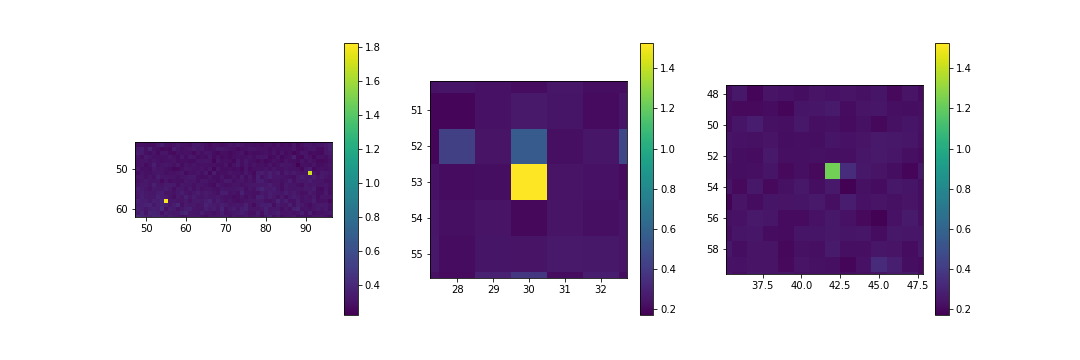

In [24]:
%matplotlib notebook

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(norm1[peakx[0]-50:peakx[0]+50, peaky[0]-50:peaky[0]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 2)
plt.imshow(norm1[peakx[-3]-50:peakx[-3]+50, peaky[-3]-50:peaky[-3]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 3)
plt.imshow(norm1[peakx[-2]-50:peakx[-2]+50, peaky[-2]-50:peaky[-2]+50])
plt.colorbar()

plt.show()

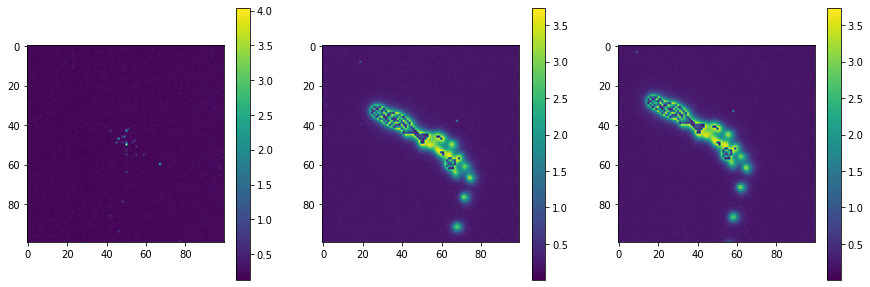

In [139]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(norm1[peaky[0]-50:peaky[0]+50, peakx[0]-50:peakx[0]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 2)
plt.imshow(norm1[peaky[-3]-50:peaky[-3]+50, peakx[-3]-50:peakx[-3]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 3)
plt.imshow(norm1[peaky[-2]-50:peaky[-2]+50, peakx[-2]-50:peakx[-2]+50])
plt.colorbar()

plt.show()

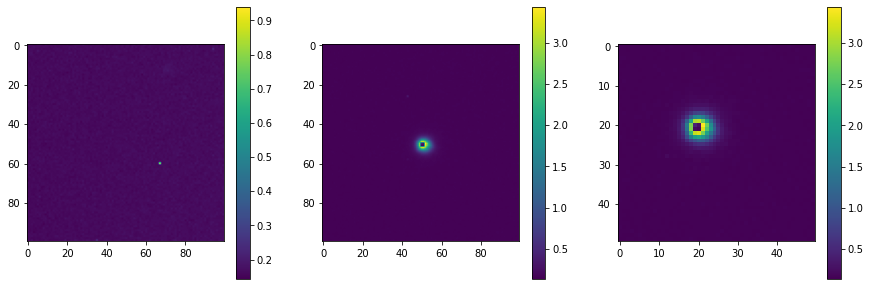

In [172]:
%matplotlib inline

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(norm2[peaky[0]-50:peaky[0]+50, peakx[0]-50:peakx[0]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 2)
plt.imshow(norm2[peaky[1]-50:peaky[1]+50, peakx[1]-50:peakx[1]+50])
plt.colorbar()

ax = fig.add_subplot(1, 3, 3)
plt.imshow(norm2[peaky[2]-25:peaky[2]+25, peakx[2]-25:peakx[2]+25])
plt.colorbar()

plt.show()

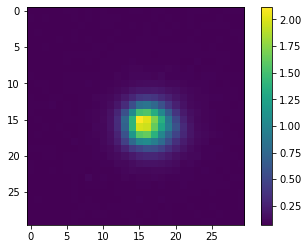

In [182]:
single = im_array[0][peaky[1]-15:peaky[1]+15, peakx[1]-15:peakx[1]+15]/flat_vis[peaky[1]-15:peaky[1]+15, peakx[1]-15:peakx[1]+15]
plt.imshow(single)
plt.colorbar()
plt.show()

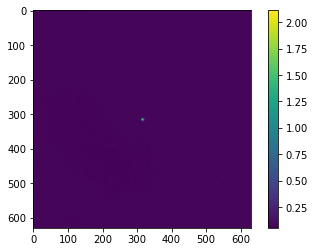

In [205]:
#single = im_array[0][peaky[1]-115:peaky[1]+115, peakx[1]-115:peakx[1]+115]/flat_vis[peaky[1]-115:peaky[1]+115, peakx[1]-15:peakx[1]+115]
plt.imshow(im_array[0][peaky[1]-315:peaky[1]+315, peakx[1]-315:peakx[1]+315]/flat_vis[peaky[1]-315:peaky[1]+315, peakx[1]-315:peakx[1]+315])
plt.colorbar()
plt.show()

In [151]:
unnorm = shift_and_stack(np.array(images)[0:50])

[[2279 2164 2085 ... 1439 1588 1601]
 [2070 2070 2123 ... 1497 1488 1601]
 [2063 2054 2123 ... 1594 1590 1651]
 ...
 [1672 1590 1604 ... 1553 1645 1529]
 [1637 1603 1608 ... 1626 1602 1615]
 [1718 1671 1575 ... 1562 1648 1664]]


<IPython.core.display.Javascript object>


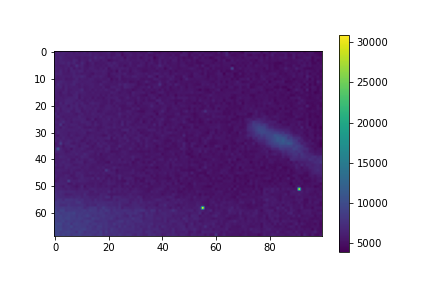

In [26]:
plt.figure()
plt.imshow(unnorm[peakx[0]-50:peakx[0]+50, peaky[0]-50:peaky[0]+50])
plt.colorbar()
plt.show()

# just to make sure they're not saturated

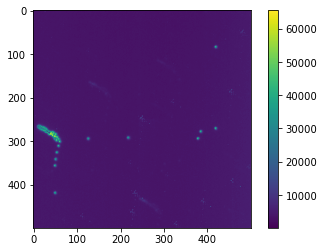

In [170]:
%matplotlib inline
plt.figure()
#plt.imshow(unnorm[peaky[0]-75:peaky[0]+75, peakx[0]-75:peakx[0]+75])
plt.imshow(unnorm[peaky[0]-250:peaky[0]+250, peakx[0]-250:peakx[0]+250])
plt.colorbar()
plt.show()

# just to make sure they're not saturated

In [220]:
def fwhm(sigma):
    return 2*np.sqrt(2*np.log(2))*sigma

def psf(array, x_cut1, x_cut2, y_cut1, y_cut2):
    x = np.linspace(x_cut1,x_cut2,x_cut2-x_cut1+1)
    y = np.linspace(y_cut1,y_cut2,y_cut2-y_cut1+1)
    x, y = np.meshgrid(x, y)
    pair = (x,y)

    # 1Dify data
    data = array[y_cut1:y_cut2+1, x_cut1:x_cut2+1].ravel()

    # initial guess
    initial_guess = (1, (x_cut1 + x_cut2)/2, (y_cut1 + y_cut2)/2, 1, 1)

    # fit!
    popt, pcov = opt.curve_fit(gauss_2d, pair, data, p0=initial_guess)
    print(popt[1], popt[2])
    print(popt[2]/(np.sqrt(len(data))))
    #print("FWHM: ", fwhm(popt[2]))
    data_fitted = gauss_2d(pair, *popt)

    #ax = fig.add_subplot(1, 3, i+1)
    #plt.imshow(data.reshape(y_cut2 + 1 - y_cut1, x_cut2 + 1 - x_cut1))
    #plt.imshow(data_fitted.reshape(y_cut2 + 1 - y_cut1, x_cut2 + 1 - x_cut1))
    #print(data_fitted.reshape(x_cut2 + 1 - x_cut1, y_cut2 + 1 - y_cut1))
    
    #img = axs[i].imshow(data_fitted.reshape(x_cut2 + 1 - x_cut1, y_cut2 + 1 - y_cut1))
    #img = plt.imshow(data_fitted.reshape(x_cut2 + 1 - x_cut1, y_cut2 + 1 - y_cut1))

    contour = plt.contour(data_fitted.reshape(x_cut2 + 1 - x_cut1, y_cut2 + 1 - y_cut1), [np.max(data_fitted)/2], colors='w')
    vs = contour.collections[0].get_paths()[0].vertices
    maxx = max(vs, key=lambda v: (v[0])) # max x coord
    minx = min(vs, key=lambda v: (v[0])) # min x coord
    maxy = max(vs, key=lambda v: (v[1])) # max y coord
    miny = min(vs, key=lambda v: (v[1])) # min y coord
    #print(maxx, minx, maxy, miny)
    
    #print(maxx[0] - minx[0])
    #print(maxy[1] - miny[1])
    print("FWHM by contour: ", ((maxx[0] - minx[0]) + (maxy[1] - miny[1]))/2)
    #plt.colorbar(img, ax=axs[i])
    #plt.show()
    
    return data_fitted.reshape(x_cut2 + 1 - x_cut1, y_cut2 + 1 - y_cut1)

#print(norm1[peaky[-2]-50:peaky[-2]+50, peakx[-2]-50:peakx[-2]+50].ravel())
#psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0)


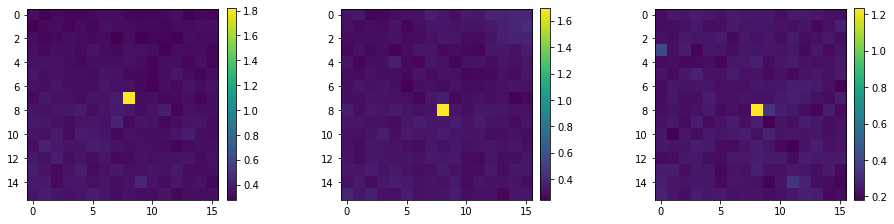

In [114]:
%matplotlib inline

#fig = plt.figure(figsize=(15,5))
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()

#ax = fig.add_subplot(2, 3, 1)
plt.subplot(131)
im = plt.imshow(norm1[peakx[0]+1:peakx[0]+17, peaky[0]-3:peaky[0]+13])
plt.colorbar(im, fraction=0.046, pad=0.04)

#ax = fig.add_subplot(2, 3, 2)
plt.subplot(132)
#plt.imshow(norm1[peakx[-3]-50:peakx[-3]+50, peaky[-3]-50:peaky[-3]+50])
im = plt.imshow(norm1[peakx[0]-7:peakx[0]+9, peaky[0]+33:peaky[0]+49])
plt.colorbar(im, fraction=0.046, pad=0.04)

#ax = fig.add_subplot(2, 3, 3)
plt.subplot(133)
im = plt.imshow(norm1[peakx[-2]-5:peakx[-2]+11, peaky[-2]-16:peaky[-2]+0])
plt.colorbar(im, fraction=0.046, pad=0.04)

""""
plt.subplot(234)
# create x and y indices
plt.imshow(psf(norm1, peakx[0]+1, peakx[0]+17, peaky[0]-3, peaky[0]+13))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')
plt.colorbar()

plt.subplot(235)
plt.imshow(psf(norm1, peakx[0]-7, peakx[0]+9, peaky[0]+33, peaky[0]+49))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')plt.colorbar()

plt.subplot(236)
plt.imshow(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')plt.colorbar()
"""

plt.show()

In [ ]:
%matplotlib inline

#fig = plt.figure(figsize=(15,5))
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()

#ax = fig.add_subplot(2, 3, 1)
plt.subplot(131)
im = plt.imshow(norm1[peakx[0]+1:peakx[0]+17, peaky[0]-3:peaky[0]+13])
plt.colorbar(im, fraction=0.046, pad=0.04)

#ax = fig.add_subplot(2, 3, 2)
plt.subplot(132)
#plt.imshow(norm1[peakx[-3]-50:peakx[-3]+50, peaky[-3]-50:peaky[-3]+50])
im = plt.imshow(norm1[peakx[0]-7:peakx[0]+9, peaky[0]+33:peaky[0]+49])
plt.colorbar(im, fraction=0.046, pad=0.04)

#ax = fig.add_subplot(2, 3, 3)
plt.subplot(133)
im = plt.imshow(norm1[peakx[-2]-5:peakx[-2]+11, peaky[-2]-16:peaky[-2]+0])
plt.colorbar(im, fraction=0.046, pad=0.04)

""""
plt.subplot(234)
# create x and y indices
plt.imshow(psf(norm1, peakx[0]+1, peakx[0]+17, peaky[0]-3, peaky[0]+13))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')
plt.colorbar()

plt.subplot(235)
plt.imshow(psf(norm1, peakx[0]-7, peakx[0]+9, peaky[0]+33, peaky[0]+49))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')plt.colorbar()

plt.subplot(236)
plt.imshow(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0))
#plt.contour(psf(norm1, peakx[-2]-5, peakx[-2]+11, peaky[-2]-16, peaky[-2]+0), [np.max(data_fitted)/2], colors='w')plt.colorbar()
"""

plt.show()

We will use a fiducial FWHM of 2 pixels and adjust accordingly.

#### Hold up, which one is HD 209458??

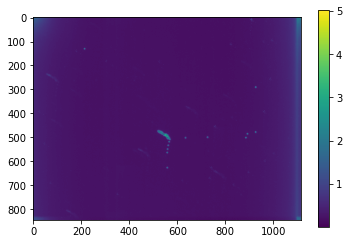

In [133]:
#%matplotlib notebook
%matplotlib inline
#plt.figure()
plt.imshow(norm1)
plt.colorbar()
plt.show()

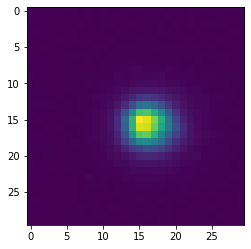

In [187]:
plt.imshow(single)

522.0466758180836 473.6519379059225
15.27909477115879
FWHM by contour:  5.487149971593725


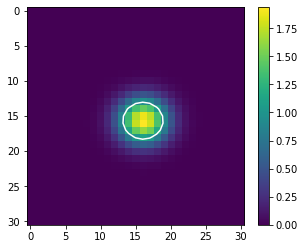

In [224]:
im = plt.imshow(psf(im_array[0]/flat_vis, peakx[1]-15, peakx[1]+15, peaky[1]-15, peaky[1]+15))
#plt.contour(psf(single, peakx[1]-15, peakx[1]+15, peaky[1]-15, peaky[1]+15), [np.max(data_fitted)/2], colors='w')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.show()

### Aperture Photometry

In [227]:
peakx, peaky, val, table_peaks = Peak_Positions(im_array[0]/flat_vis, 5, 0.9)
peakx, peaky = [int(px) for px in peakx], [int(py) for py in peaky]
print(peakx, peaky, val)

      x_peak  y_peak  peak_value
632      324     196    1.000008
1063     984     611    1.000008
959      521     473    2.113052
[324, 521, 984] [196, 473, 611] [1.00000765 2.11305171 1.00000765]


In [245]:
import photutils
print(photutils.__version__)
from photutils import aperture_photometry, CircularAperture, CircularAnnulus

# largely from the photutils docs: https://photutils.readthedocs.io/en/stable/aperture.html

#fig, axs = plt.subplots(1, 2, figsize=(15,5))
#axs = axs.ravel()
f_targ_raw = []
n_targ = []
f_sky_pix = []
table_peaks = table_peaks.loc[table_peaks.x_peak == 984]
fwhm = 5
i = 1063
# cut/crop
buffer = 25
temp = im_array[0]/flat_vis
data = temp[int(table_peaks.y_peak[i])-buffer:int(table_peaks.y_peak[i])+buffer, # for plotting to check
   int(table_peaks.x_peak[i])-buffer:int(table_peaks.x_peak[i])+buffer] 
mask = np.ones(temp.shape) # to count number of pixels in aperture

# define target aperture, centered on each star
aperture = CircularAperture((table_peaks.x_peak[i], table_peaks.y_peak[i]), r=1.3*fwhm)

# raw intensity and pixel count in aperture
f_targ_raw.append(aperture_photometry(temp, aperture)['aperture_sum'][0])
n_targ.append(aperture_photometry(mask, aperture)['aperture_sum'][0])

# define sky aperture, with annulus
annulus = CircularAnnulus((table_peaks.x_peak[i], table_peaks.y_peak[i]), r_in=2.*fwhm, r_out=3.*fwhm)

# calculate median intensity per pixel in annulus
annulus_data = annulus.to_mask(method='center').multiply(temp) # get only data from inside annulus
mask = annulus.to_mask(method='center').data # new mask for the annulus
annulus_data_1d = annulus_data[mask > 0] # 1Dify data, approx size of mask
_, an_median, _ = sigma_clipped_stats(annulus_data_1d)
f_sky_pix.append(an_median/annulus.area)

# sky subtract after the loop

"""
# plot
img = axs[i].imshow(data)
ap = axs[i].imshow(aperture.to_mask(method='center'))
an = axs[i].imshow(annulus.to_mask(method='center'))
plt.colorbar(img, ax=axs[i])
#plt.ylim([-100, 100])
#plt.xlim([-100, 100])

plt.show()
"""
    
table_peaks['f_targ_raw'] = f_targ_raw
table_peaks['n_targ'] = n_targ
table_peaks['f_sky_pix'] = f_sky_pix

# now I sky subtract
table_peaks['f_targ'] = table_peaks['f_targ_raw'] - table_peaks['n_targ']*table_peaks['f_sky_pix']

# convert to instrumental magnitude
table_peaks['instrumental_magnitude'] = -2.5*np.log10(table_peaks['f_targ'])

# compare to catalog star
#For your standard star: d_m = m_catalog(std) - m_i(std)
#For the target star: m_obs = m_i(targ) + d_m
# NGC 869 768's magnitude in the V band is 10.686
m_catalog_std = 10.686
d_m = 10.686 - (-7.845246)
print(d_m)

# m_obs
table_peaks['m_obs'] = table_peaks['instrumental_magnitude'] + d_m
print(table_peaks)

1.0.1
18.531246
      x_peak  y_peak  peak_value  f_targ_raw     n_targ  f_sky_pix     f_targ  \
1063     984     611    1.000008   12.870916  132.73229    0.00023  12.840349   

      instrumental_magnitude      m_obs  
1063               -2.771442  15.759804  


### Time series analysis

In [264]:
instrumental_mags = []
for j in range(len(im_array)):
    peakx, peaky, val, table_peaks = Peak_Positions(im_array[j]/flat_vis, 5, 1.5)
    peakx, peaky = [int(px) for px in peakx], [int(py) for py in peaky]
    #print(peakx, peaky, val)
    table_peaks = table_peaks.reset_index()
    f_targ_raw = []
    n_targ = []
    f_sky_pix = []
    fwhm = 5
    # cut/crop
    buffer = 25
    temp = im_array[0]/flat_vis
    data = temp[int(table_peaks.y_peak[0])-buffer:int(table_peaks.y_peak[0])+buffer, # for plotting to check
       int(table_peaks.x_peak[0])-buffer:int(table_peaks.x_peak[0])+buffer] 
    mask = np.ones(temp.shape) # to count number of pixels in aperture

    # define target aperture, centered on each star
    #print((table_peaks.x_peak[0], table_peaks.y_peak[0]))
    aperture = CircularAperture((table_peaks.x_peak[0], table_peaks.y_peak[0]), r=1.3*fwhm)

    # raw intensity and pixel count in aperture
    f_targ_raw.append(aperture_photometry(temp, aperture)['aperture_sum'][0])
    n_targ.append(aperture_photometry(mask, aperture)['aperture_sum'][0])

    # define sky aperture, with annulus
    annulus = CircularAnnulus((table_peaks.x_peak[0], table_peaks.y_peak[0]), r_in=2.*fwhm, r_out=3.*fwhm)

    # calculate median intensity per pixel in annulus
    annulus_data = annulus.to_mask(method='center').multiply(temp) # get only data from inside annulus
    mask = annulus.to_mask(method='center').data # new mask for the annulus
    annulus_data_1d = annulus_data[mask > 0] # 1Dify data, approx size of mask
    _, an_median, _ = sigma_clipped_stats(annulus_data_1d)
    f_sky_pix.append(an_median/annulus.area)
    
    table_peaks['f_targ_raw'] = f_targ_raw
    table_peaks['n_targ'] = n_targ
    table_peaks['f_sky_pix'] = f_sky_pix

    # now I sky subtract
    table_peaks['f_targ'] = table_peaks['f_targ_raw'] - table_peaks['n_targ']*table_peaks['f_sky_pix']

    # convert to instrumental magnitude
    instrumental_mag = -2.5*np.log10(table_peaks['f_targ'])
    table_peaks['instrumental_magnitude'] = instrumental_mag
    instrumental_mags.append(instrumental_mag)

In [266]:
len(instrumental_mags)

738

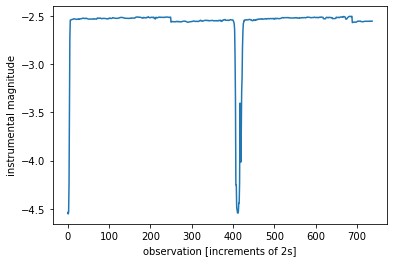

In [267]:
plt.plot(range(len(im_array)), instrumental_mags)
plt.ylabel('instrumental magnitude')
plt.xlabel('observation [increments of 2s]')
plt.show()

In [273]:
from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=2, mean=400, stddev=4)
print(len(range(len(im_array))))
print(len([-1*imag for imag in instrumental_mags]))
fitted = fitter(model, range(len(im_array)), [-1*imag for imag in instrumental_mags])
plt.plot(range(len(im_array)), -fitted)
plt.plot(range(len(im_array)), instrumental_mags)
plt.show()

738
738


TypeError: leastsq: there is a mismatch between the input and output shape of the 'Dfun' argument '_wrap_deriv'.Shape should be (3, 544644) but it is (3, 738).